In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.2.0'

In [6]:
import numpy as np

In [7]:

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential

# sample weights
np.random.seed(0)
w = 0.5 * np.random.normal(size=(4, 4))
b = np.zeros((4))

model1 = Sequential(name="model1")
model1.add(Dense(4, activation='sigmoid', 
                 input_shape=(4,), weights=(w, b), name="dense1"))
type(model1)

model1.summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


## 이미지를  내부에 표시하려면 dpi 세팅 필요

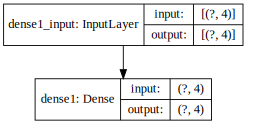

In [13]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(model1, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

## 함수형 API 로 모델 정의 

In [10]:
input_layer2 = Input(shape=(4,), name="input2")
hidden_layer2 = Dense(4, activation='sigmoid', 
                      weights=(w, b), name="dense2")(input_layer2)
model2 = Model(input_layer2, hidden_layer2, name="model2")
type(model2)

tensorflow.python.keras.engine.training.Model

In [11]:
model2.summary()

Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (InputLayer)          [(None, 4)]               0         
_________________________________________________________________
dense2 (Dense)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


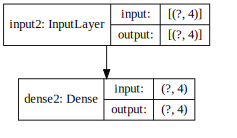

In [14]:
SVG(model_to_dot(model2, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

## 기존 모델을 아웃풋 형태로 넣기

In [15]:
model3 = Model(input_layer2, model1(input_layer2), name="model3")
model3.summary()

Model: "model3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (InputLayer)          [(None, 4)]               0         
_________________________________________________________________
model1 (Sequential)          (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


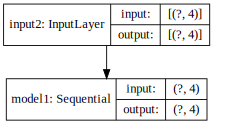

In [17]:
SVG(model_to_dot(model3, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

## 다른 모델을 사용함

In [18]:
input_layer4 = Input(shape=(4,), name="input4")
model4 = Model(input_layer4, model2(input_layer4), name="model4")
model4.summary()

Model: "model4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input4 (InputLayer)          [(None, 4)]               0         
_________________________________________________________________
model2 (Model)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


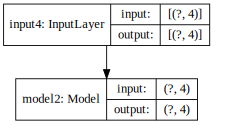

In [20]:
SVG(model_to_dot(model4, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [21]:
import numpy as np

In [22]:
data = np.ones((1, 4))

y = 1 / (1 + np.exp(-(w.T).dot(data.T)))


In [23]:
y

array([[0.89517384],
       [0.49439434],
       [0.7787448 ],
       [0.87421386]])

In [24]:
model1.predict(data)

array([[0.89517385, 0.49439433, 0.7787448 , 0.8742138 ]], dtype=float32)